## Homework \#2

Student: Alan Akil

Course: Math 6397 - Stochastic Processes in Biology

Professors: Dr. Josić & Dr. Stewart



In [4]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
from numba import njit, prange
import time
from scipy.integrate import solve_ivp

## Problem 1. Define the function to simulate the system

In [102]:
# @jit
def sim_case1(x,c_1,c_2,c_3,T):
    # x=[Y_1,Y_2] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([ c_1 * x[i,0], c_2 * x[i,0] * x[i,1], c_3 * x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
#         print(sum_a)
#         print(cumsum_a)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        i+=1
    return x,t_x


## Sample simulation of problem 1

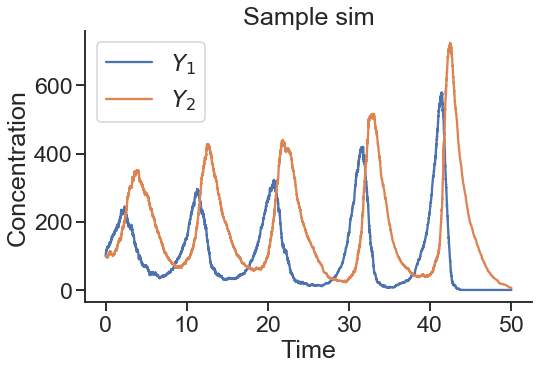

In [116]:
# Case 1 - sample simulation
c_1 = 1; c_2 = 0.005; c_3 = 0.6;
y_1_0 = 100
y_2_0 = 100
x = np.array([y_1_0,y_2_0]).reshape(1,2)
T = 50

np.random.seed(1)

x,t_x = sim_case1(x,c_1,c_2,c_3,T)


# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(t_x,x[:,0],label='$Y_1$')
plt.plot(t_x,x[:,1],label='$Y_2$')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
sns.despine()

plt.title(r'Sample sim')

plt.show()

## Problem 1: What parameter should we change to make $Y_1$ more likely to go extinct?

In [118]:
# Case 1 - sample simulation
c_1 = 1; c_2 = 0.005; c_3 = 0.6;
y_1_0 = 10
y_2_0 = 10
x = np.array([y_1_0,y_2_0]).reshape(1,2)
T = 10

np.random.seed(20)

x1,t_x1 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 2; c_2 = 0.005; c_3 = 0.6;
x2,t_x2 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 1; c_2 = 0.05; c_3 = 0.6;
x3,t_x3 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 1; c_2 = 0.005; c_3 = 1;
x4,t_x4 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 1/2; c_2 = 0.005; c_3 = 0.6;
x5,t_x5 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 1; c_2 = 0.001; c_3 = 0.6;
x6,t_x6 = sim_case1(x,c_1,c_2,c_3,T)

x = np.array([y_1_0,y_2_0]).reshape(1,2)
c_1 = 1; c_2 = 0.005; c_3 = 0.1;
x7,t_x7 = sim_case1(x,c_1,c_2,c_3,T)



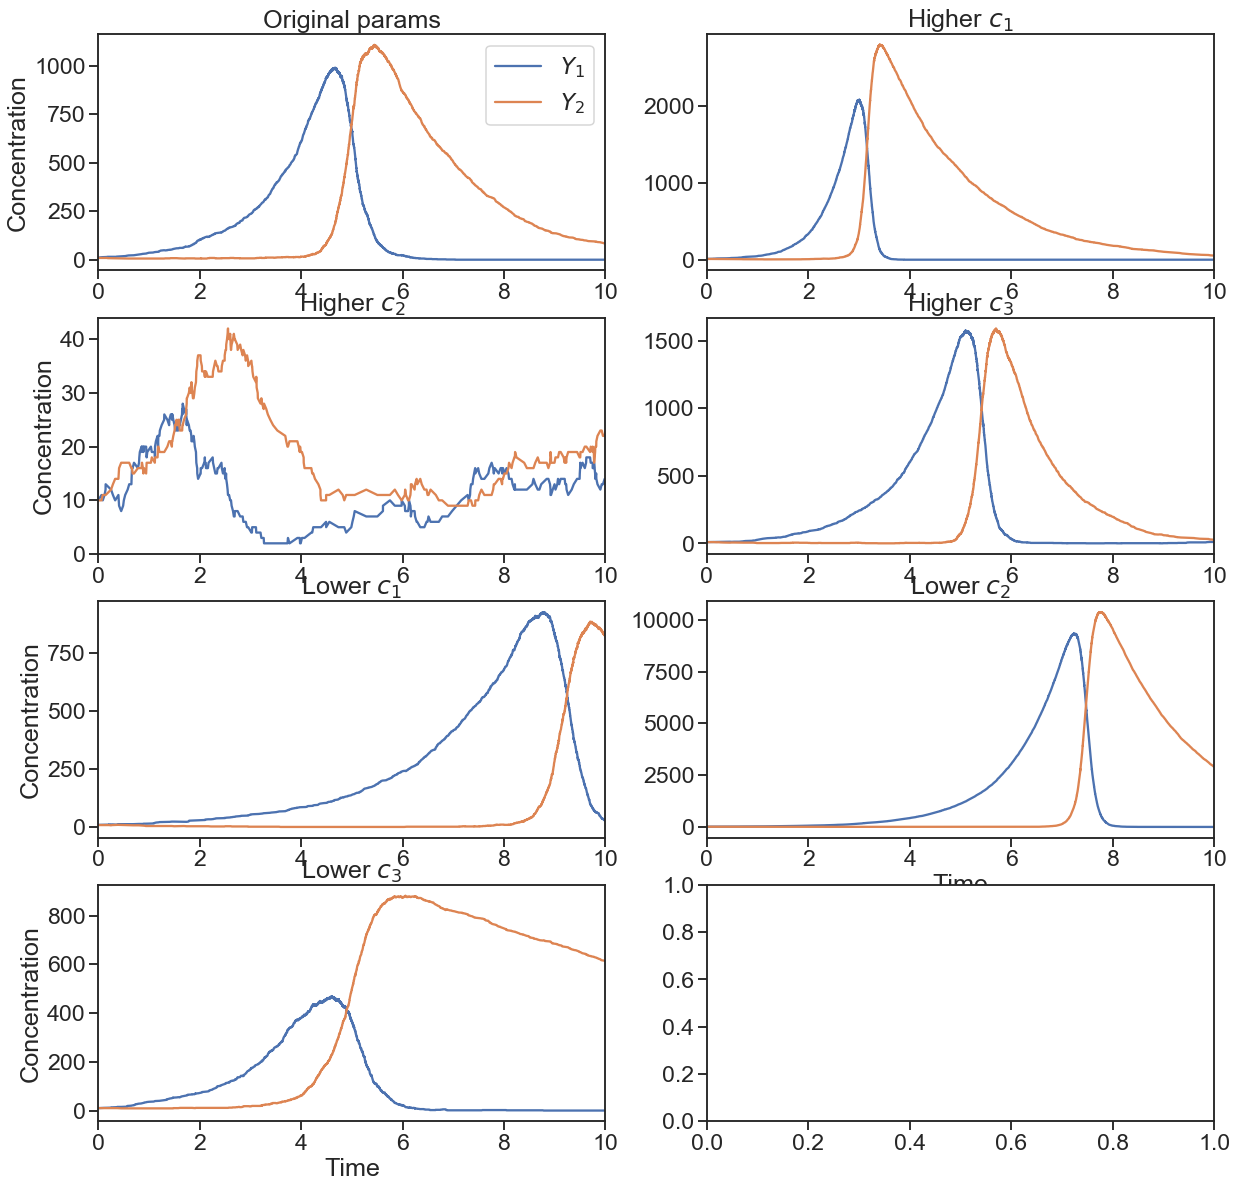

In [58]:
# Plot time series and histogram for case I and II
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs[0, 0].plot(t_x1, x1[:,0],label='$Y_1$')
axs[0, 0].plot(t_x1, x1[:,1],label='$Y_2$')
axs[0, 0].set_title('Original params')
axs[0, 0].legend()
axs[0, 0].set(ylabel='Concentration',xlim=((0,T)))

axs[0, 1].plot(t_x2, x2[:,0])
axs[0, 1].plot(t_x2, x2[:,1])
axs[0, 1].set_title('Higher $c_1$')
axs[0, 1].set(xlim=((0,T)))

axs[1, 0].plot(t_x3, x3[:,0])
axs[1, 0].plot(t_x3, x3[:,1])
axs[1, 0].set_title('Higher $c_2$')
axs[1, 0].set(ylabel='Concentration',xlim=((0,T)))

axs[1, 1].plot(t_x4, x4[:,0])
axs[1, 1].plot(t_x4, x4[:,1])
axs[1, 1].set_title('Higher $c_3$')
axs[1, 1].set(xlim=((0,T)))

axs[2, 0].plot(t_x5, x5[:,0])
axs[2, 0].plot(t_x5, x5[:,1])
axs[2, 0].set_title('Lower $c_1$')
axs[2, 0].set(ylabel='Concentration',xlim=((0,T)))

axs[2, 1].plot(t_x6, x6[:,0])
axs[2, 1].plot(t_x6, x6[:,1])
axs[2, 1].set_title('Lower $c_2$')
axs[2, 1].set(xlabel='Time',xlim=((0,T)))

axs[3, 0].plot(t_x7, x7[:,0])
axs[3, 0].plot(t_x7, x7[:,1])
axs[3, 0].set_title('Lower $c_3$')
axs[3, 0].set(ylabel='Concentration',xlabel='Time',xlim=((0,T)))

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.show()
    

Question: Changing which parameter will make it more likely for species 1 to go extinct? What about species 2? Change these parameters gradually to verify your hypothesis in simulations.

$\textbf{Answer:}$ Increasing $c_1$ makes $Y_1$ more likely to go extinct, because the faster $Y_1$ is produced, the faster it will convert to $Y_2$.

On the other hand, $Y_2$ will be more likely to go extinct if the rate of death $c_3$ is increased.

## Problem 2: Define the function first

In [61]:
# @jit
def sim_case1(x,k,alpha_1,alpha_2,k_a,T):
    # x=[Y_1,Y_2] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,0],[-1,0],[0,1],[0,-1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([ k, alpha_1 * x[i,0], k_a * x[i,0] * x[i,1],
                      k, alpha_2 * x[i,1], k_a * x[i,0] * x[i,1]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        i+=1
    return x,t_x


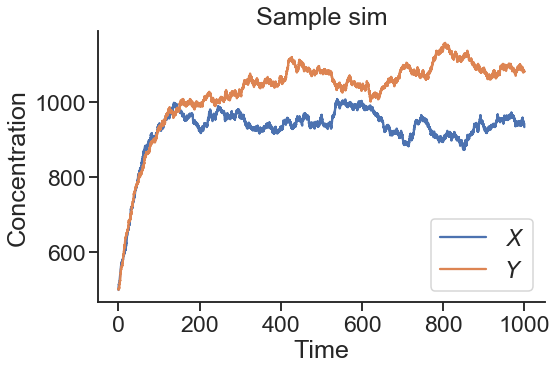

In [67]:
# Sample simulatoin of system in problem 2
k = 10; alpha_1 = 10**(-6); alpha_2 = 10**(-5); k_a = 10**(-5);

x_0 = 500
y_0 = 500
x = np.array([x_0,y_0]).reshape(1,2)
T = 1000

np.random.seed(1)

x,t_x = sim_case1(x,k,alpha_1,alpha_2,k_a,T)

# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(t_x,x[:,0],label='$X$')
plt.plot(t_x,x[:,1],label='$Y$')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
sns.despine()

plt.title(r'Sample sim')

plt.show()

Problem 2

$\textbf{Question}$: Run the Gillespie algorithm and show that the behavior is very different in the two cases. Compute the stationary distributions in the two cases.

In [82]:
# Sample simulatoin of system in problem 2 for both set of parameters.
k = 10; alpha_1 = 10**(-6); alpha_2 = 10**(-5); k_a = 10**(-5);
x_0 = 800
y_0 = 1300
T = 200

np.random.seed(20)


x = np.array([x_0,y_0]).reshape(1,2)
x1,t_x1 = sim_case1(x,k,alpha_1,alpha_2,k_a,T)

k = 10**3; alpha_1 = 10**(-4); alpha_2 = 10**(-3); k_a = 10**(-3);
x = np.array([x_0,y_0]).reshape(1,2)
x2,t_x2 = sim_case1(x,k,alpha_1,alpha_2,k_a,T)

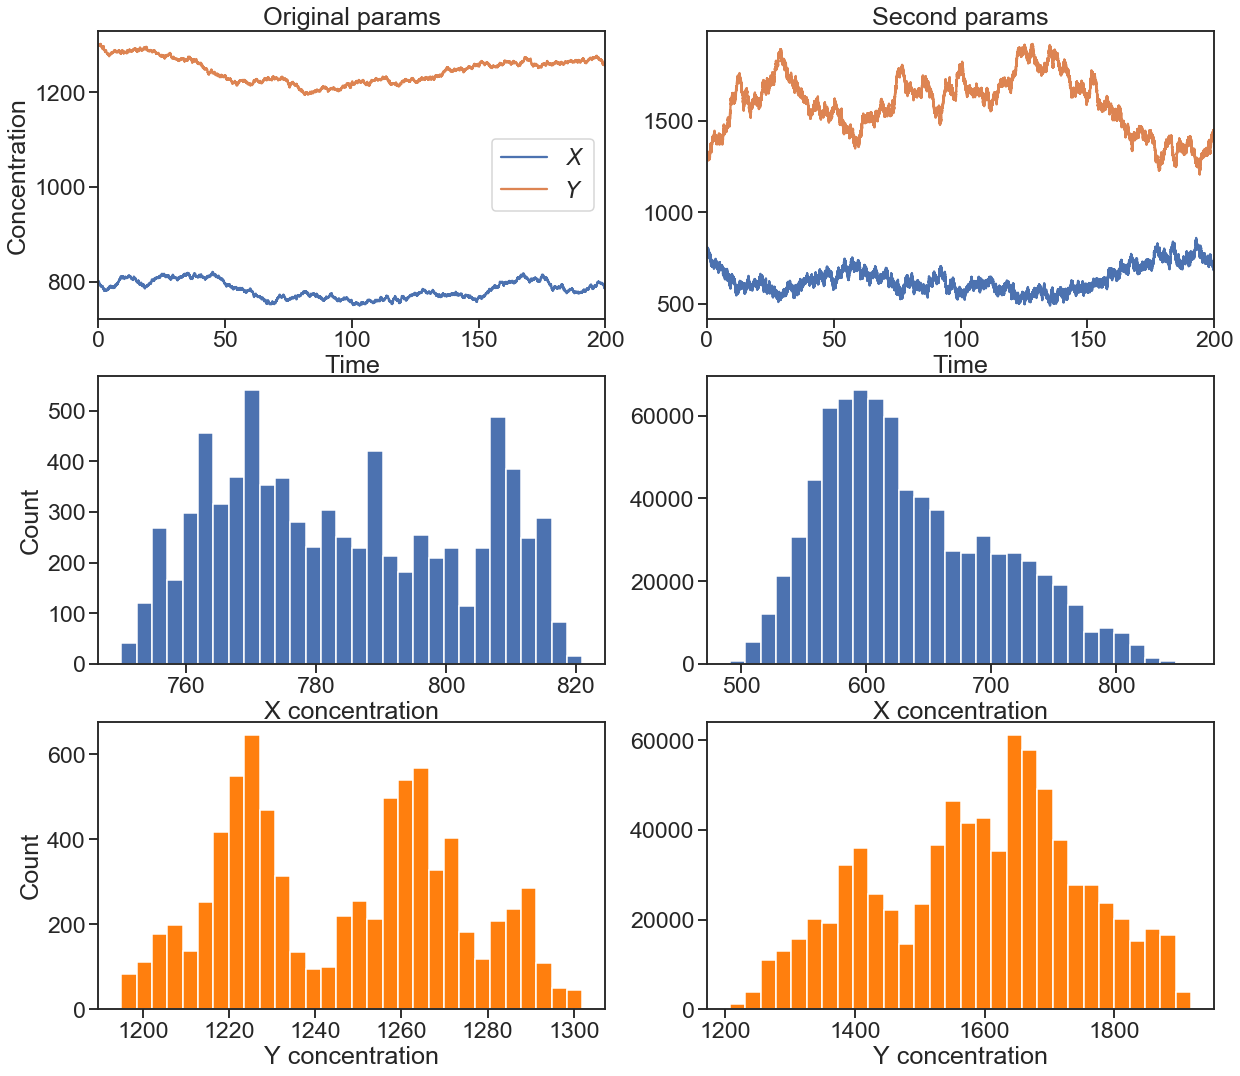

In [100]:
# Plot time series and histogram for case I and II
fig, axs = plt.subplots(3, 2, figsize=(20,18))
axs[0,0].plot(t_x1, x1[:,0],label='$X$')
axs[0,0].plot(t_x1, x1[:,1],label='$Y$')
axs[0,0].set_title('Original params')
axs[0,0].legend()
axs[0,0].set(ylabel='Concentration',xlabel='Time',xlim=((0,T)))

axs[0,1].plot(t_x2, x2[:,0])
axs[0,1].plot(t_x2, x2[:,1])
axs[0,1].set_title('Second params')
axs[0,1].set(xlabel='Time',xlim=((0,T)))

axs[1,0].hist(x1[:,0],bins=30)
axs[1,0].set(ylabel = 'Count',xlabel='X concentration')

axs[1,1].hist(x2[:,0],bins=30)
axs[1,1].set(xlabel='X concentration')

axs[2,0].hist(x1[:,1],bins=30,color='tab:orange')
axs[2,0].set(ylabel = 'Count',xlabel='Y concentration')

axs[2,1].hist(x2[:,1],bins=30,color='tab:orange')
axs[2,1].set(xlabel='Y concentration')




# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.show()
    

$\textbf{Question}$: Run the Gillespie algorithm and show that the behavior is very different in the two cases. Compute the stationary distributions in the two cases.

$\textbf{Answer:}$ See plots above for stationary distributions.

$\textbf{Question}$: Why are the stationary distributions so different?

$\textbf{Answer:}$ In the second case (second column in plot above), the concentrations of $X$ and $Y$ fluctuate a lot more than in the first case. This is shown in the time series, but also in the distributions: the variance of $X$ and $Y$ is notably larger for the second case compared to the first case, reflecting the large fluctuations in the time series. 

Note that all the parameters in the second case are 100 times larger. This means that the rates of birth and death of $X$ and $Y$ are going to be much larger. This leads to reactions taking place more often (higher rates) and consequently the concentrations of $X$ and $Y$ fluctuate much more. This also explains the much larger computation time for simulations with the second set of parameters.

## Problem 3

In [144]:
k_l=0; gamma_p = 1; gamma_r = 1; k_p = 1; k_0 = 1; K=1/2; n=1;

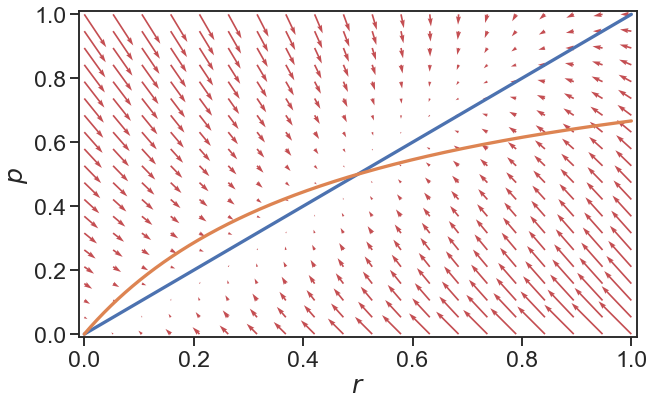

In [145]:
# Start the figure.
fig=plt.figure(figsize=(10,6))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})

# function that returns dz/dt
def f(z,t):
    drdt = k_l + k_0 *(z[1]/K)**n / (1+(z[1]/K)**n) - gamma_r * z[0] 
    dpdt = k_p * z[0] - gamma_p * z[1]
    dzdt = [drdt,dpdt]
    return dzdt

r = np.linspace(0,1,num=20)
p = np.linspace(0,1,num=20)
J1,J2 = np.meshgrid(r, p) # grid of point

t = 0

u, v = np.zeros(J1.shape), np.zeros(J2.shape)


NI, NJ = J1.shape

for i in range(NI):
    for j in range(NJ):
        x = J1[i, j]
        y = J2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

widths = np.linspace(0, 0.001, J1.size)
Q = plt.quiver(J1, J2, u, v, color='r',linewidths=widths)
from scipy.integrate import odeint

# plt.plot(np.transpose(mat_contents['timeAveragedJ_EE'][1][0]), 
#                       np.transpose(mat_contents['timeAveragedJ_IE'][1][0]), linewidth=3,color = 'blue')        
r = np.linspace(0,1,1000)

plt.plot(r, k_p*r/gamma_p)

plt.plot(r, k_0*(r/K)**n / (1+(r/K)**n) / gamma_r)

plt.xlabel('$r$')
plt.ylabel('$p$')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

plt.show()

When $n=1$, the fixed points are at $(r_*,p_*) = (0,0)$ and $(r_*,p_*) = (0.5,0.5)$.

In [146]:
k_l=0; gamma_p = 1; gamma_r = 1; k_p = 1; k_0 = 1; K=1/2; n=10;

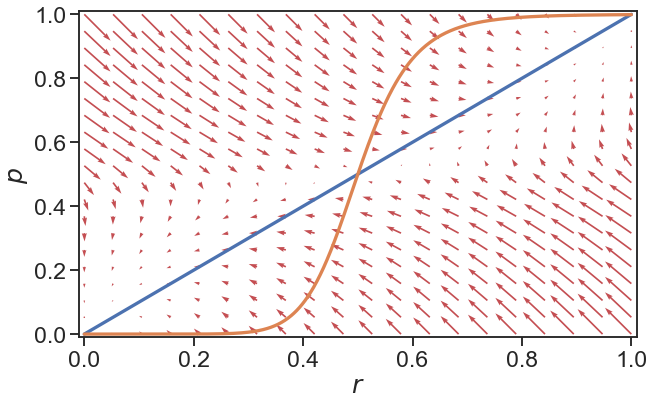

In [147]:
# Start the figure.
fig=plt.figure(figsize=(10,6))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":3.3})

# function that returns dz/dt
def f(z,t):
    drdt = k_l + k_0 *(z[1]/K)**n / (1+(z[1]/K)**n) - gamma_r * z[0] 
    dpdt = k_p * z[0] - gamma_p * z[1]
    dzdt = [drdt,dpdt]
    return dzdt

r = np.linspace(0,1,num=20)
p = np.linspace(0,1,num=20)
J1,J2 = np.meshgrid(r, p) # grid of point

t = 0

u, v = np.zeros(J1.shape), np.zeros(J2.shape)


NI, NJ = J1.shape

for i in range(NI):
    for j in range(NJ):
        x = J1[i, j]
        y = J2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

widths = np.linspace(0, 0.001, J1.size)
Q = plt.quiver(J1, J2, u, v, color='r',linewidths=widths)
from scipy.integrate import odeint

# plt.plot(np.transpose(mat_contents['timeAveragedJ_EE'][1][0]), 
#                       np.transpose(mat_contents['timeAveragedJ_IE'][1][0]), linewidth=3,color = 'blue')        
r = np.linspace(0,1,1000)

plt.plot(r, k_p*r/gamma_p)

plt.plot(r, k_0*(r/K)**n / (1+(r/K)**n) / gamma_r)

plt.xlabel('$r$')
plt.ylabel('$p$')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

plt.show()

When $n=1$, the system has stable fixed points at $(r_*,p_*) = (0,0)$ and $(r_*,p_*) = (0.999,0.999)$; and an unstable fixed point at $(r_*,p_*) = (0.5,0.5)$.

In [171]:
# @jit
def sim_case1(x,k_l,gamma_p,gamma_r,k_p,k_0,K,n,T):
    # x=[r,p] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([ k_l + k_0 / (1+(x[i,1]/K)**n), gamma_r * x[i,0], k_p * x[i,0],
                      gamma_p * x[i,1] ])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        i+=1
    return x,t_x


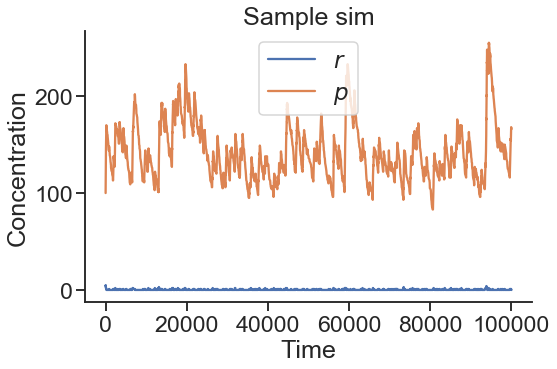

In [185]:
# Sample simulatoin of system in problem 2
k_l=0.001; gamma_p = 0.00028; gamma_r = 0.0083; k_p = 0.17; k_0 = 0.01; K=100; n=10;

r_0 = 4
p_0 = 100
x = np.array([r_0,p_0]).reshape(1,2)
T = 100000

np.random.seed(10)

x,t_x = sim_case1(x,k_l,gamma_p,gamma_r,k_p,k_0,K,n,T)

# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

plt.plot(t_x,x[:,0],label='$r$')
plt.plot(t_x,x[:,1],label='$p$')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
sns.despine()

plt.title(r'Sample sim')

plt.show()

In [200]:
# Sample simulatoin of system in problem 2
k_l=0.001; gamma_p = 0.00028; gamma_r = 0.0083; k_p = 0.17; k_0 = 0.01; n=10;

r_0 = 4
p_0 = 100

T = 200000

np.random.seed(10)
x = np.array([r_0,p_0]).reshape(1,2)
K=100;
x1,t_x1 = sim_case1(x,k_l,gamma_p,gamma_r,k_p,k_0,K,n,T)

np.random.seed(10)
p_0 = 700
x = np.array([r_0,p_0]).reshape(1,2)
K=10000;
x2,t_x2 = sim_case1(x,k_l,gamma_p,gamma_r,k_p,k_0,K,n,T)


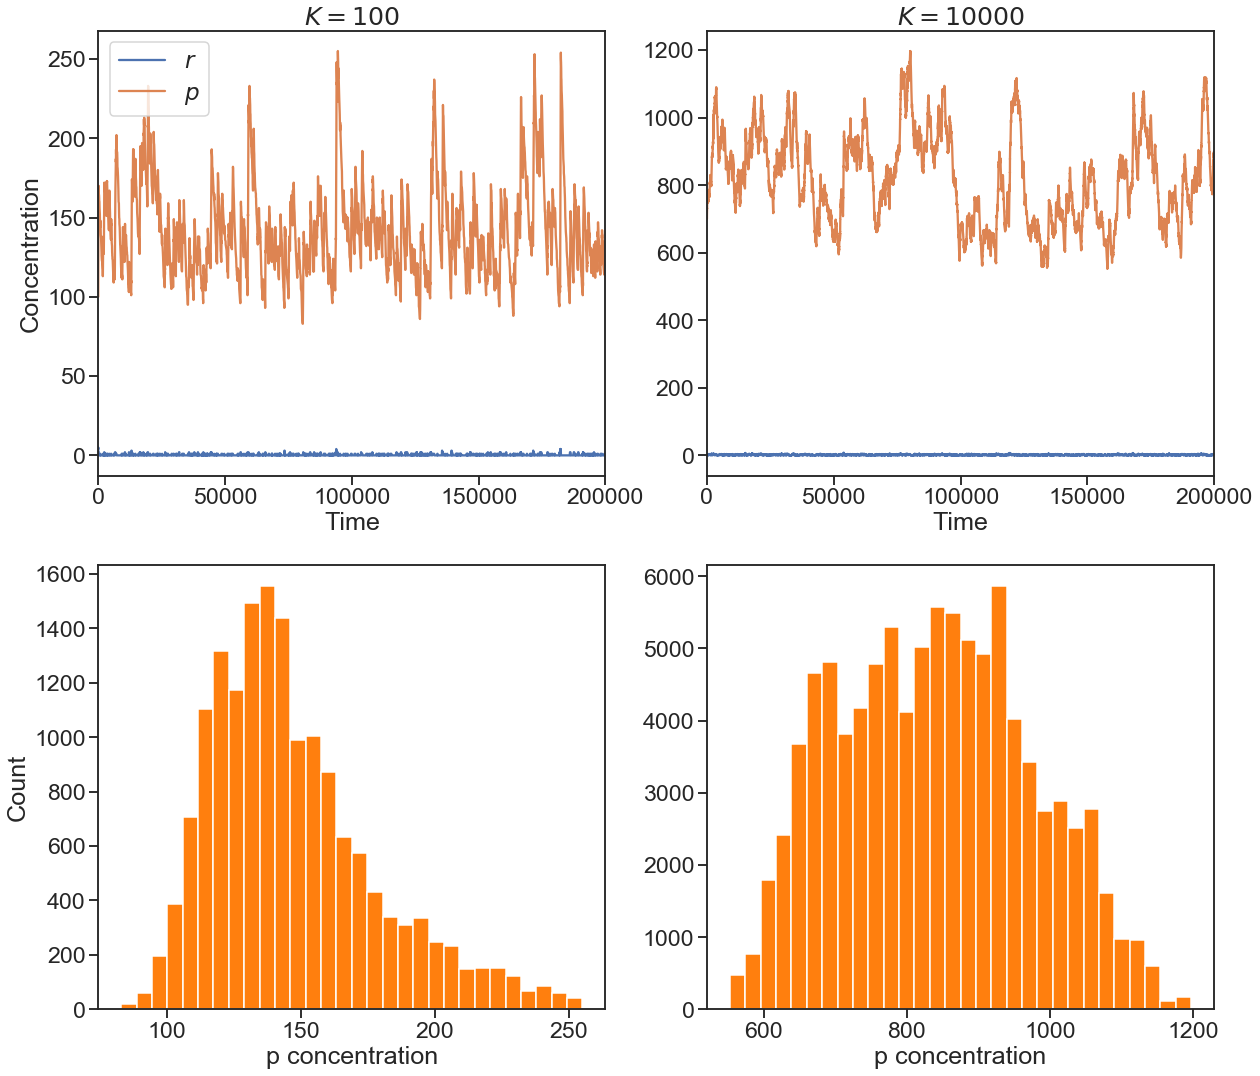

In [201]:
# Plot time series and histogram for case I and II
fig, axs = plt.subplots(2, 2, figsize=(20,18))
axs[0,0].plot(t_x1, x1[:,0],label='$r$')
axs[0,0].plot(t_x1, x1[:,1],label='$p$')
axs[0,0].set_title('$K=100$')
axs[0,0].legend()
axs[0,0].set(ylabel='Concentration',xlabel='Time',xlim=((0,T)))

axs[0,1].plot(t_x2, x2[:,0])
axs[0,1].plot(t_x2, x2[:,1])
axs[0,1].set_title('$K=10000$')
axs[0,1].set(xlabel='Time',xlim=((0,T)))

axs[1,0].hist(x1[:,1],bins=30, color='tab:orange')
axs[1,0].set(ylabel = 'Count',xlabel='p concentration')

axs[1,1].hist(x2[:,1],bins=30, color='tab:orange')
axs[1,1].set(xlabel='p concentration')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.show()
    

Calculate the ratio of the standard deviation to the mean of the distribution for $K=100,10000$.

In [203]:
print( 'For K=100, CV =', np.std(x1[:,1])/np.mean(x1[:,1]) )
print( 'For K=10000, CV =', np.std(x2[:,1])/np.mean(x2[:,1]) )

For K=100, CV = 0.21051582730754864
For K=10000, CV = 0.15967442867997164
